<a href="https://www.kaggle.com/code/mrsimple07/salary-prediction?scriptVersionId=194055775" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/salary-prediction-data/salary_prediction_data.csv


In [2]:
import pandas as pd

df = pd.read_csv('/kaggle/input/salary-prediction-data/salary_prediction_data.csv')

df.head()

,Education,Experience,Location,Job_Title,Age,Gender,Salary
0,High School,8,Urban,Manager,63,Male,84620.053665
1,PhD,11,Suburban,Director,59,Male,142591.255894
2,Bachelor,28,Suburban,Manager,61,Female,97800.255404
3,High School,29,Rural,Director,45,Male,96834.671282
4,PhD,25,Urban,Analyst,26,Female,132157.786175


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Education   1000 non-null   object 
 1   Experience  1000 non-null   int64  
 2   Location    1000 non-null   object 
 3   Job_Title   1000 non-null   object 
 4   Age         1000 non-null   int64  
 5   Gender      1000 non-null   object 
 6   Salary      1000 non-null   float64
dtypes: float64(1), int64(2), object(4)
memory usage: 54.8+ KB


In [4]:
df.describe()


,Experience,Age,Salary
count,1000.000000,1000.000000,1000.000000
mean,14.771000,42.377000,105558.404239
std,8.341111,13.609412,28256.972075
min,1.000000,20.000000,33510.510669
25%,7.000000,30.000000,85032.141517
50%,15.000000,43.000000,104314.518315
75%,22.000000,55.000000,126804.047524
max,29.000000,64.000000,193016.602150


In [5]:
df.isnull().sum()

Education     0
Experience    0
Location      0
Job_Title     0
Age           0
Gender        0
Salary        0
dtype: int64

In [6]:
df['Education'].value_counts()

Education
High School    255
Bachelor       253
PhD            251
Master         241
Name: count, dtype: int64

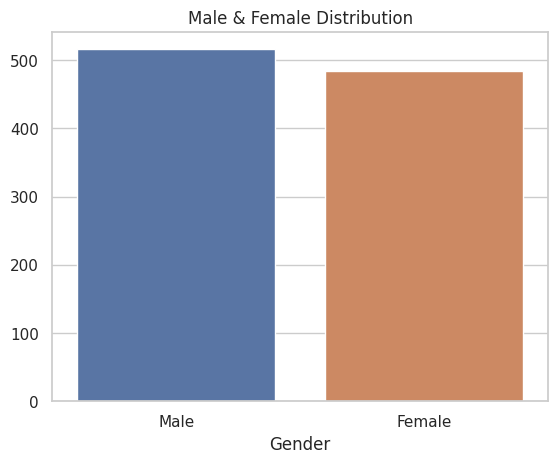

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style = 'whitegrid')

gender_num = df['Gender'].value_counts()

sns.barplot(x = gender_num.index, y = gender_num.values)
plt.title('Male & Female Distribution')
plt.show()



## First we are going to use Simple models to predict the data

#### 1. Linear Regression

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['Salary'])
y = df['Salary']

X = pd.get_dummies(X)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

model = LinearRegression().fit(X_train, y_train)

y_pred= model.predict(X_test)

print(mean_squared_error(y_test, y_pred))

105996277.66096857


#### 2. Machine Learning models and Cross Validation

In [9]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, KFold
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error

X = df.drop(columns=['Salary'])
y = df['Salary']

X = pd.get_dummies(X)

# Define models
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(),
    'Decision Tree': DecisionTreeRegressor()
}

num_folds = 5
results = {}
for name, model in models.items():
    kfold = KFold(n_splits=num_folds, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X, y, cv=kfold, scoring='neg_mean_squared_error')
    rmse_scores = np.sqrt(-cv_results)
    results[name] = rmse_scores

for name, scores in results.items():
    print(f"{name}: Mean RMSE: {scores.mean()}, Std Dev: {scores.std()}")



Linear Regression: Mean RMSE: 10019.537163430707, Std Dev: 218.22808666467242
Random Forest: Mean RMSE: 11311.813006325665, Std Dev: 461.468988177455
Decision Tree: Mean RMSE: 14728.480727198155, Std Dev: 397.4469216598627
